In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dm-data/test_new.csv
/kaggle/input/dm-data/train_new.csv


# Problem Formulation:
* Define the problem. 
predict Wish.com product ratings for items that are listed. Instead of detailing the goods, the idea is to gauge how likely it is that purchasers will find its qualities appealing. To obtain further understanding of Wish.com's consumer base, the problem also attempts to explain the conditions in which a product receives a high rating.
* What is the input? 
tabular dataset containing information about the products listed on Wish.com.
* What is the output? 
the predicted product rating for each product in the dataset.
* What data mining function is required? 
supervised classification  function
* What could be the challenges? 
-Preprocessing: Since the dataset is said to be unclean, it might be necessary to do preprocessing procedures including feature engineering, noise removal, and management of missing information.
-Feature selection: For precise forecasts, determining the most pertinent features that influence the product ratings may be essential.
-Class imbalance: The model's performance and interpretation may be impacted by an imbalance in the dataset's product rating distribution.
-Noise in the data: The addition of noise to the dataset may cause further complications and have an impact on how accurate the predictions are.
* What is the impact?
There are two benefits to solving this issue. First off, it gives you a way to gauge how likely it is that buyers would enjoy a product before you sell it on Wish.com. This information can be used to make more educated decisions about where to put products and how much inventory to have on hand. Second, knowing the circumstances under which a product gets great reviews provides valuable information about the tastes and habits of Wish.com's user base.
* What is an ideal solution?
Creating a categorization model that correctly forecasts product ratings based on the given features is the optimal solution. 

# Answer the questions below (briefly):

* Why Data Mining is a misnomer?
Because information and patterns are to be extracted from massive amounts of data, not the data itself to be extracted (mined),
* What is another preferred name?
knowledge discovery in databases(KDD)


* What is the general knowledge discovery process?
finding knowledge in databases the difficult procedure
* What is the difference between a data engineer and data scientist/AI engineer?
Data engineers acquire pertinent data, who then move and transform it into "pipelines" for data scientists.
Data Scientist They examine, verify, compile, and enhance the information.
AI engineers develop cutting-edge products that promote autonomy.
In order to provide clients with products that are useful, data scientists and AI engineers collaborate closely.


* In data mining, what is the difference between prediction and categorization?
The process of classifying involves assigning a (categorial) class (or label) to each element in a dataset.
The process of prediction is to forecast a continuous value from a dataset that is incomplete or unknown.


* Why data science/machine learning is a bad idea in the context of information security?
Because of data corruption,unauthorized data access,and intercepting conversations.


* What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
Confidentiality: safeguards are put in place to stop illegal access to sensitive data.
Integrity: refers to preserving data's reliability, correctness, and consistency over its whole lifecycle.
Availability: refers to the idea that data should always be regularly and easily accessible to those who are permitted.

In [2]:
#reading data
test_data=pd.read_csv('/kaggle/input/dm-data/test_new.csv')
train_data=pd.read_csv('/kaggle/input/dm-data/train_new.csv')

In [3]:
train_data.head(10)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
5,14.00,51,EUR,100,0,4.0,36,0,0,0,...,pashesa,"(16,885 notes)",16885,3.897898,58a6f41a96f1bb57840b0ed4,0,NaN,summer,2020-08,633
6,3.67,9,EUR,5000,0,3.0,510,0,0,0,...,shenzhenfinejofashioncoltd,"(253,249 notes)",253249,4.070618,53e4bb20ff4d6d1b68bdb6d1,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,38
7,8.00,7,EUR,50,1,4.0,6,0,0,0,...,xiakeliuxingfushi,82 % avis positifs (519 notes),519,3.791908,5b0fa1b72c3c1d2abb34f1a4,0,NaN,summer,2020-08,203
8,9.00,8,EUR,5000,0,4.0,761,0,0,0,...,leescloset,"88 % avis positifs (5,819 notes)",5819,4.151916,583e34bb0299bc7904a92edf,0,NaN,summer,2020-08,1230
9,19.00,21,EUR,5000,0,4.0,1561,0,0,0,...,litiannetworking,"87 % avis positifs (9,116 notes)",9116,4.092914,530306fe34067e3f15c41d87,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,826


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

# **checking for null values**
* droping null row for columns with small of nulls
* replace null by mode for columns with high number of nulls


In [5]:
 train_data.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [6]:
test_data.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [7]:
train_data.dropna(subset=['origin_country','product_color','product_variation_size_id','merchant_name'], inplace=True)
test_data=test_data.drop(columns=['merchant_info_subtitle'])

In [8]:
#replacing null values in data by the mode 
#reference:https://stackoverflow.com/q/40619445
for column in ['has_urgency_banner','urgency_text','merchant_profile_picture']:
    mode = train_data[column].mode().values[0]  # Extract the first mode value only
    train_data[column] = train_data[column].fillna(mode)
for column in ['has_urgency_banner','urgency_text','merchant_profile_picture']:
    mode = test_data[column].mode().values[0]  # Extract the first mode value only
    test_data[column] = test_data[column].fillna(mode)

In [9]:
train_data.isna().sum()

price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
urgency_text                    0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_p

In [10]:
test_data.isna().sum()

price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   12
product_variation_size_id        2
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner               0
urgency_text                     0
origin_country                   5
merchant_title                   0
merchant_name                    0
merchant_rating_count            0
merchant_rating                  0
merchant_id                      0
merchant_has_profile_picture     0
merchant_profile_pic

In [11]:
#dropping column with unique value as doesnot give any helpful information for decision 
train_data=train_data.drop(columns=['currency_buyer','theme','crawl_month'])
test_data=test_data.drop(columns=['currency_buyer','theme','crawl_month'])


In [12]:
train_data.head().T

,0,1,2,3,4
price,8.0,8.0,6.0,4.67,8.0
retail_price,7,7,34,4,11
units_sold,10000,1000,100,100,1000
uses_ad_boosts,1,0,0,1,0
rating,4.0,4.0,4.0,3.0,4.0
rating_count,1670,843,10,82,127
badges_count,0,1,0,0,0
badge_local_product,0,1,0,0,0
badge_product_quality,0,0,0,0,0
badge_fast_shipping,0,0,0,0,0


# Analysis fo different columns

In [13]:
train_data[['rating']].value_counts()

rating
4.0       738
5.0       154
3.0       131
2.0        12
1.0         2
6.0         1
Name: count, dtype: int64

In [14]:
#drop rating 6 as it has one,two sample respectivly which will be difficult for model to train  
train_data = train_data[train_data['rating']<= 5]


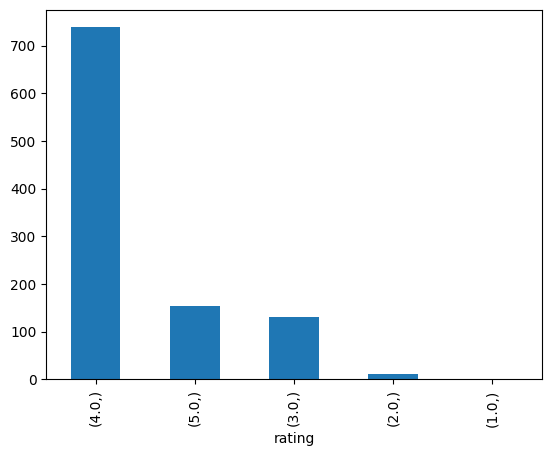

In [15]:
train_data[['rating']].value_counts().plot(kind='bar');

if you are interested in rating 1,2 give me more data for them because this small data model cannot learn from it well

In [16]:
train_data[['shipping_option_name']].value_counts()

shipping_option_name   
Livraison standard         993
Standard Shipping           15
Envio Padrão                 6
Expediere Standard           4
الشحن القياسي                4
Envío normal                 3
Standardversand              3
Standardowa wysyłka          2
Standart Gönderi             2
Стандартная доставка         2
Livraison Express            1
Spedizione standard          1
ការដឹកជញ្ជូនតាមស្តង់ដារ      1
Name: count, dtype: int64

just two options 
'Livraison standard'        
'Standard Shipping' in different languages 

In [17]:
product_color = train_data['product_color'].value_counts()
product_color[product_color > 2]


product_color
black            213
white            165
blue              76
pink              68
yellow            66
green             60
red               60
grey              48
purple            36
armygreen         22
winered           19
navyblue          18
orange            16
multicolor        14
khaki             10
white & green      8
lightblue          8
gray               6
coffee             6
skyblue            5
rosered            5
brown              5
rose               4
lightpink          4
darkblue           4
beige              4
black & green      3
White              3
Black              3
black & white      3
Name: count, dtype: int64

In [18]:
product_color_test = test_data['product_color'].value_counts()
product_color_test[product_color_test > 2]

product_color
black         83
white         81
yellow        36
red           32
pink          31
green         29
grey          23
blue          22
purple        16
orange        11
navyblue      10
armygreen      9
winered        9
beige          9
multicolor     6
gray           5
lightblue      4
rosered        3
floral         3
Name: count, dtype: int64

**Same color with different writings >>so we will map the colors**

In [19]:
color_mapping = {
    'Black': 'black',
    'White': 'white',
    'navyblue': 'blue',
    'lightblue': 'blue',
    'skyblue': 'blue',
    'darkblue': 'blue',
    'navy': 'blue',
    'winered': 'red',
    'rosered': 'red',
    'rose': 'red',
    'orange-red': 'red',
    'lightpink': 'pink',
    'armygreen': 'green',
    'khaki': 'green',
    'lightgreen': 'green',
    'fluorescentgreen': 'green',
    'gray': 'grey',
    'coffee': 'brown',
    'multicolor': 'other',
    'floral': 'other',
    'leopard': 'other',
    'camouflage': 'other',
    'white & green': 'dual',
    'black & green': 'dual',
    'black & white': 'dual',
    'camouflage': 'other'
}

train_data['product_color'] = train_data['product_color'].replace(color_mapping)
train_data['product_color'] = train_data['product_color'].fillna('other')

test_data['product_color'] = test_data['product_color'].replace(color_mapping)
test_data['product_color'] = test_data['product_color'].fillna('other')

product_color = train_data['product_color'].value_counts()
product_color[product_color > 2]

product_color
black     216
white     168
blue      112
green      96
red        90
pink       72
yellow     66
grey       54
purple     36
other      20
orange     16
dual       14
brown      11
beige       4
Name: count, dtype: int64

In [21]:
train_data['product_color'].isna().sum()

0

In [22]:
product_size = train_data['product_variation_size_id'].value_counts()
product_size[product_size > 1]

product_variation_size_id
S            431
XS           240
M            132
XXS           73
L             29
XL            12
S.            12
XXL           11
XXXS           5
Size S         4
4XL            4
XS.            4
M.             4
Size-S         3
2XL            3
Size-XS        3
s              3
SIZE XS        2
Size4XL        2
25             2
Size -XXS      2
33             2
SizeL          2
35             2
29             2
2pcs           2
Name: count, dtype: int64

In [23]:
product_size_test = test_data['product_variation_size_id'].value_counts()
product_size_test[product_size_test > 1]

product_variation_size_id
S          197
XS         108
M           65
XXS         24
L           20
S.           5
XL           5
XXL          4
SIZE XS      2
EU 35        2
3XL          2
s            2
34           2
Name: count, dtype: int64

**Same size with different writings >>so we will map the sizes**

In [24]:
size_mapping = {
    'S.': 'S',
    'XS.': 'S',
    'M.': 'M',
    'Size S': 'S',
    'Size-XS': 'S',
    'SIZE XS': 'S',
    'Size-S': 'S',
    'Size4XL': 'XL',
    'size S': 'S',
    'Size M': 'M',
    'Size -XXS': 'S',
    'SIZE-XXS': 'S',
    'Size S.': 'S',
    's': 'S',
    'SizeL': 'L',
    '5XL': 'XL',
    '4XL': 'XL',
    '3XL': 'XL',
    '2XL': 'XL'
}

train_data['product_variation_size_id'] = train_data['product_variation_size_id'].replace(size_mapping)
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace(size_mapping)

product_size = train_data['product_variation_size_id'].value_counts()
product_size[product_size > 1]

product_variation_size_id
S       467
XS      240
M       137
XXS      73
L        31
XL       22
XXL      11
XXXS      5
29        2
2pcs      2
33        2
35        2
25        2
Name: count, dtype: int64

**Encoding categorical columns by LabelEncoder**

In [20]:
label_encoder = LabelEncoder()
train_data['product_color'] = label_encoder.fit_transform(train_data['product_color'])
test_data['product_color'] = label_encoder.fit_transform(test_data['product_color'])

print(train_data['product_color'])

0       60
1        8
2       53
3       27
4        5
        ..
1088    25
1089    48
1091    46
1092     8
1093    60
Name: product_color, Length: 1037, dtype: int64


In [25]:
train_data['product_variation_size_id'] = label_encoder.fit_transform(train_data['product_variation_size_id'])
test_data['product_variation_size_id'] = label_encoder.fit_transform(test_data['product_variation_size_id'])
print(train_data['product_variation_size_id'])

0       27
1       26
2       26
3       46
4       30
        ..
1088    30
1089    30
1091    27
1092    27
1093    46
Name: product_variation_size_id, Length: 1037, dtype: int64


In [26]:
train_data['product_variation_size_id'].isna().sum()

0

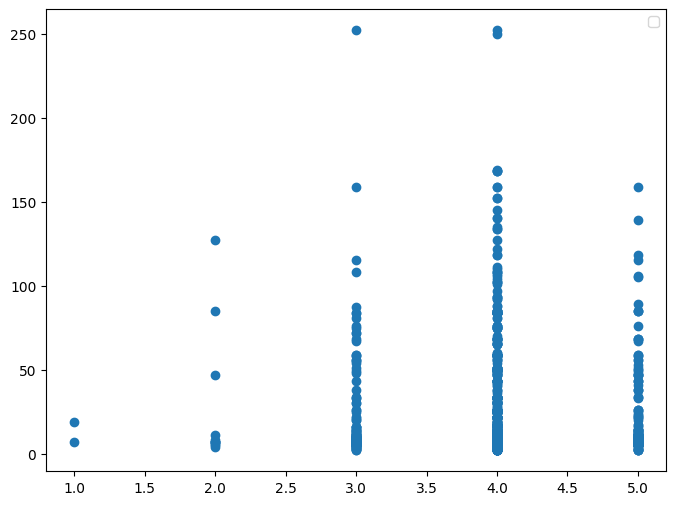

In [27]:
#price and retail price percentage related to rating 
plt.figure(figsize=(8, 6))
percentage=(train_data['retail_price']/train_data['price'])*train_data['price']
percentage_test=(test_data['retail_price']/test_data['price'])*test_data['price']
percentage = percentage.sort_values(ascending=True)
plt.scatter(train_data['rating'],percentage)
plt.legend()
plt.show()

we notes that rating 3,4,5 more affected by retail price: price percentage 

In [28]:
#making column of retail price: price percentage to be added to dataframe
discount_percentage=pd.Series(percentage)
discount_percentage_test=pd.Series(percentage_test)
discount_percentage.isna().sum()

0

# Heat Map 

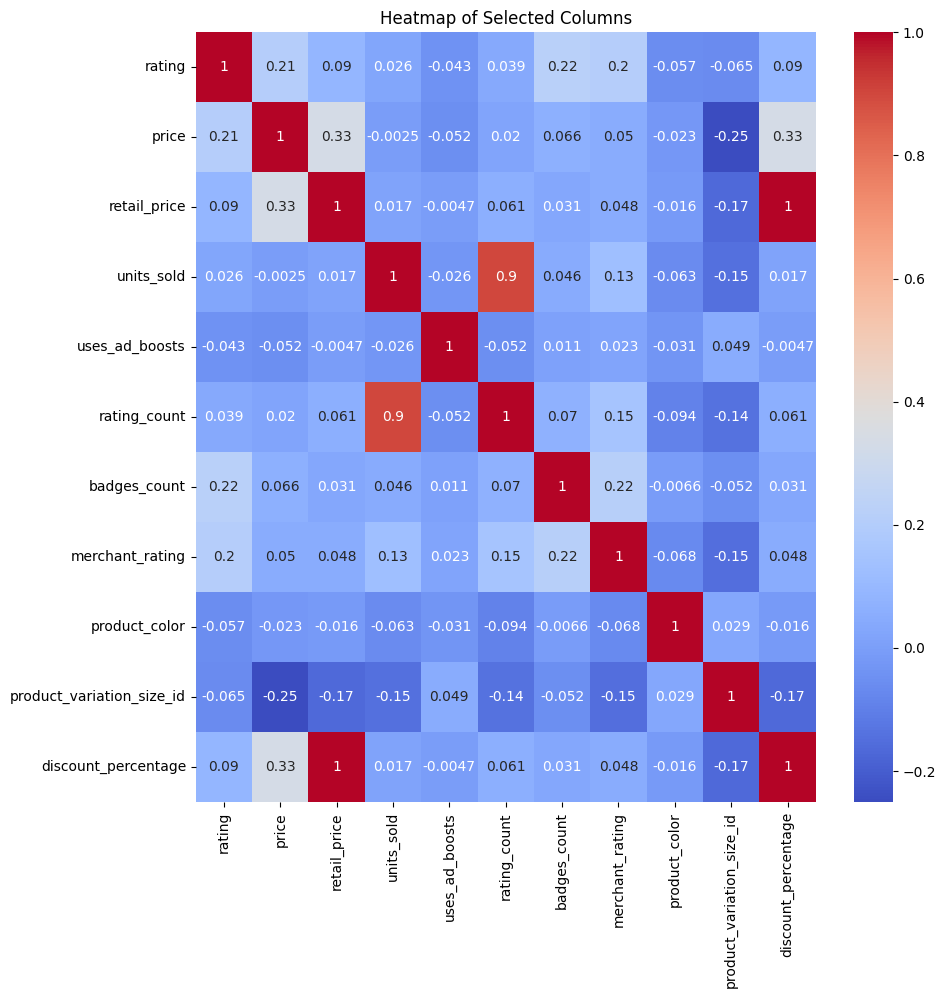

In [29]:
#choosed columns to work with 
heat_data=train_data[['rating','price','retail_price','units_sold','uses_ad_boosts','rating_count','badges_count','merchant_rating','product_color','product_variation_size_id']].copy()
x_test=test_data[['price','retail_price','units_sold','uses_ad_boosts','rating_count','badges_count','merchant_rating','product_color','product_variation_size_id']].copy()
#convert to dataframe to work on it 
heat_data=pd.DataFrame(heat_data)
x_test=pd.DataFrame(x_test)
#adding new column which is drived by feature engineering for price and retail_price
heat_data = pd.concat([heat_data, discount_percentage.to_frame('discount_percentage')], axis=1)
x_test = pd.concat([x_test, discount_percentage_test.to_frame('discount_percentage_test')], axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(heat_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Selected Columns')
plt.show()

**from heat map we notice that rating is most affected by price, badges_count and merchant_rating**

# # Model Tuning

In [30]:
heat_data.head(5)

,rating,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,merchant_rating,product_color,product_variation_size_id,discount_percentage
0,4.0,8.00,7,10000,1,1670,0,4.137582,60,27,7.0
1,4.0,8.00,7,1000,0,843,1,4.256873,8,26,7.0
2,4.0,6.00,34,100,0,10,0,3.928920,53,26,34.0
3,3.0,4.67,4,100,1,82,0,4.079365,27,46,4.0
4,4.0,8.00,11,1000,0,127,0,4.306358,5,30,11.0


In [31]:
heat_data.isna().sum()

rating                       0
price                        0
retail_price                 0
units_sold                   0
uses_ad_boosts               0
rating_count                 0
badges_count                 0
merchant_rating              0
product_color                0
product_variation_size_id    0
discount_percentage          0
dtype: int64

# Splitting Data

In [32]:
data=heat_data.drop(columns=['rating'])
target=heat_data['rating']
x_train,x_val,y_train,y_val=train_test_split(data, target , test_size=0.20, random_state=42)

In [33]:
#to avoid Bias for some features we used standard scaler for standarization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val= scaler.fit_transform(x_val)
x_test= scaler.fit_transform(x_test)

# Decision Tree

In [34]:
# model 1
tree = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth=7,min_samples_split=10)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_val)
f1 = f1_score(y_val, y_pred ,average='weighted')
print(f1)

_id=test_data['id']
pred_test = tree.predict(x_test)
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('tree1.csv', index=False)

0.6426534654861269


**gini criteria is doing well but maybe entropy will get higher score**

In [35]:
# model 2
treee = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=7,min_samples_split=10)
treee.fit(x_train, y_train)
y_pred = treee.predict(x_val)
f1 = f1_score(y_val, y_pred ,average='weighted')
print(f1)

pred_test = treee.predict(x_test)
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('tree2.csv', index=False)

0.6454326923076923


**entory gives little bit higher score than gini**

# Support Vector Machine

In [47]:
#model 1
svm_classifier = SVC(max_iter=20,gamma=.15,C=3)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_val)
f1 = f1_score(y_val, y_pred ,average='weighted')
print(f1)


pred_test = svm_classifier.predict(x_test)
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('SVM1.csv', index=False)

0.5967770655270654


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**larger value of gamma with smaller no. of max_iter may give higher score**

In [46]:
# model 2
svm_classifier = SVC(max_iter=10,gamma=.25,C=3)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_val)
f1 = f1_score(y_val, y_pred ,average='weighted')
print(f1)

pred_test = svm_classifier.predict(x_test)
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('SVM2.csv', index=False)

0.606660557318452


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# Naive Bayes

In [38]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred = nb_classifier.predict(x_val)
f1 = f1_score(y_val, y_pred ,average='weighted')
print(f1)

pred_test = tree.predict(x_test)
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': pred_test})
pred_df.to_csv('NaiveBayes.csv', index=False)

0.4102447263857953
